# 2010 Baja CA EQ, QTM Catalog Mapping: Density Grid Test Point4



In [1]:
# IMPORT CELL; updated 2/11/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import obspy.geodetics as gd # Imported whole file
#from obspy.geodetics import locations2degrees # calc_dist() alike?
#from obspy.taup.taup_geo import calc_dist # calc_dist()

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported! ")

Imported! 


In [2]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range

Wall time: 637 ms


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
341563,2010,3,5,22,40,56.570,332205,33.63921,-116.69371,16.395,...,11023517,0.208,0.021,0,2010-03-05T22:40:56.570000Z,1.267829e+09,2010-03-05T22:40:56.570000Z,1.267829e+09,-30.0,-720.0
341564,2010,3,5,22,44,28.810,332206,33.00096,-116.33812,8.098,...,14599964,0.274,0.024,0,2010-03-05T22:44:28.810000Z,1.267829e+09,2010-03-05T22:44:28.809999Z,1.267829e+09,-30.0,-720.0
341565,2010,3,5,22,59,35.670,332207,33.68388,-116.70518,16.740,...,9715717,0.182,0.019,0,2010-03-05T22:59:35.670000Z,1.267830e+09,2010-03-05T22:59:35.670000Z,1.267830e+09,-30.0,-720.0
341566,2010,3,5,23,22,38.272,14597244,33.89683,-116.20141,9.967,...,14597244,1.0,0.01,1,2010-03-05T23:22:38.272000Z,1.267831e+09,2010-03-05T23:22:38.271999Z,1.267831e+09,-30.0,-719.0
341567,2010,3,5,23,37,37.430,332209,33.17265,-115.61604,2.806,...,11247074,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.330,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.290,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.620,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.670,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


## Density Grid: Fourth Point - Point4
Salton Sea Geothermal Field<br>(33.163333, -115.616667)

In [3]:
GridPoints = pd.read_csv("Maps/Density Grid/GridPoints.csv")

In [4]:
# Create fourth point for analysis: Salton Sea Geothermal Field

Point4 = pd.DataFrame({"LATITUDE" : [33.163333], "LONGITUDE" : [-115.616667]})
#Point3["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point4

,LATITUDE,LONGITUDE
0,33.163333,-115.616667


In [5]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists4_Deg = gd.locations2degrees(Point4.LATITUDE, Point4.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point4
Dists4_KM = gd.degrees2kilometers(Dists4_Deg)
# Converted all distances to kilometers
Dists4_KM

array([ 113.11966027,   69.59950866,  116.42661925, ...,   58.33360844,
        128.18320016,   56.60893844])

In [6]:
# Define a new copy of the data
Point4Data = QTM_Range.copy(deep = True)
Point4Data["DISTANCE"] = Dists4_KM
Point4Data.describe()

# Only take data within, say, 11km of Point4!
Point4Data_11KM = Point4Data.loc[Point4Data["DISTANCE"] <= 11]
Point4Data_11KM
# Sometimes, this returns only five datapoints instead of 989; switched notebooks and it was fine?

#Point4Data.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DISTANCE
341567,2010,3,5,23,37,37.43,332209,33.17265,-115.61604,2.806,...,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0,1.037646
341576,2010,3,6,0,19,20.39,332218,33.14356,-115.63249,5.473,...,0.218,0.022,0,2010-03-06T00:19:20.390000Z,1.267835e+09,2010-03-06T00:19:20.390000Z,1.267835e+09,-30.0,-718.0,2.646483
341577,2010,3,6,0,19,56.57,332219,33.14179,-115.65155,6.859,...,0.233,0.021,0,2010-03-06T00:19:56.570000Z,1.267835e+09,2010-03-06T00:19:56.570000Z,1.267835e+09,-30.0,-718.0,4.035338
341579,2010,3,6,0,25,3.85,332221,33.18110,-115.70356,5.294,...,0.172,0.018,0,2010-03-06T00:25:03.850000Z,1.267835e+09,2010-03-06T00:25:03.850000Z,1.267835e+09,-30.0,-718.0,8.325236
341580,2010,3,6,0,30,26.59,332222,33.17610,-115.60214,3.590,...,0.202,0.02,0,2010-03-06T00:30:26.590000Z,1.267835e+09,2010-03-06T00:30:26.589999Z,1.267835e+09,-30.0,-718.0,1.960499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479413,2010,5,4,15,44,30.21,464483,33.20818,-115.56323,3.645,...,0.204,0.019,0,2010-05-04T15:44:30.210000Z,1.272988e+09,2010-05-04T15:44:30.210000Z,1.272988e+09,30.0,713.0,7.042477
479854,2010,5,4,20,54,42.03,464911,33.17954,-115.59611,2.528,...,0.261,0.019,0,2010-05-04T20:54:42.030000Z,1.273006e+09,2010-05-04T20:54:42.030000Z,1.273006e+09,30.0,718.0,2.628406
479860,2010,5,4,20,56,45.55,464917,33.17723,-115.59897,3.860,...,0.271,0.021,0,2010-05-04T20:56:45.550000Z,1.273007e+09,2010-05-04T20:56:45.549999Z,1.273007e+09,30.0,718.0,2.258540
479861,2010,5,4,20,57,30.25,14693428,33.19033,-115.61246,5.399,...,1.0,0.01,0,2010-05-04T20:57:30.250000Z,1.273007e+09,2010-05-04T20:57:30.250000Z,1.273007e+09,30.0,718.0,3.027356


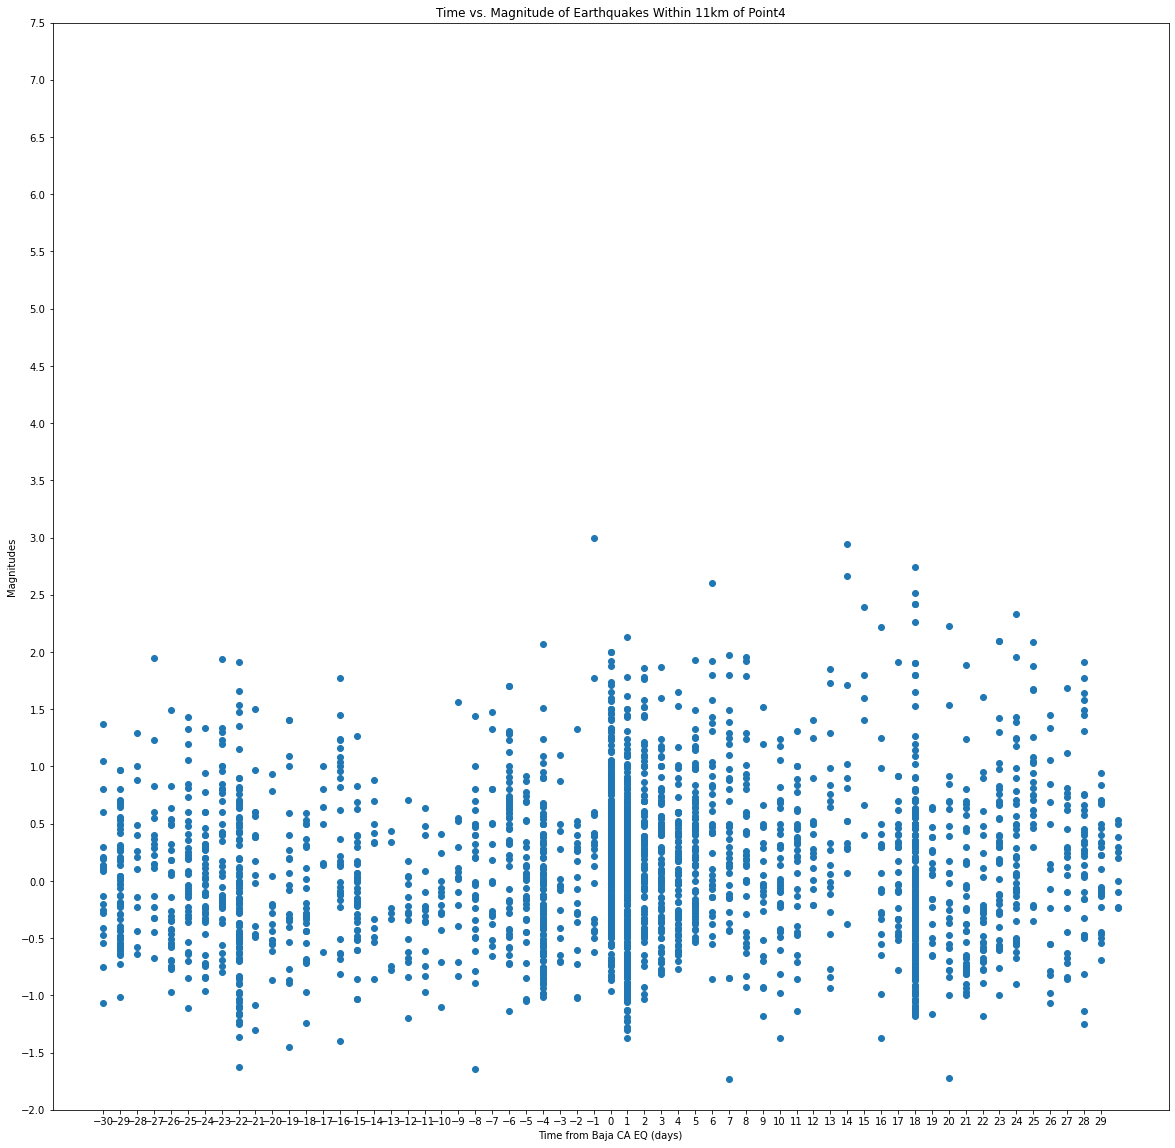

In [7]:
# Plot time vs. magnitude for Point4 data: days

plt.figure(figsize=(20,20))
plt.scatter(Point4Data_11KM["RELATIVE DAY"], Point4Data_11KM["MAGNITUDE"]);
plt.xlabel("Time from Baja CA EQ (days)");
plt.ylabel("Magnitudes");
plt.title("Time vs. Magnitude of Earthquakes Within 11km of Point4");
plt.xticks(range(-30, 30));
plt.yticks(np.arange(-2,8,0.5));

plt.savefig("Maps/Density Grid/Point4/Point4_MagnitudeDays.png", facecolor = "white");

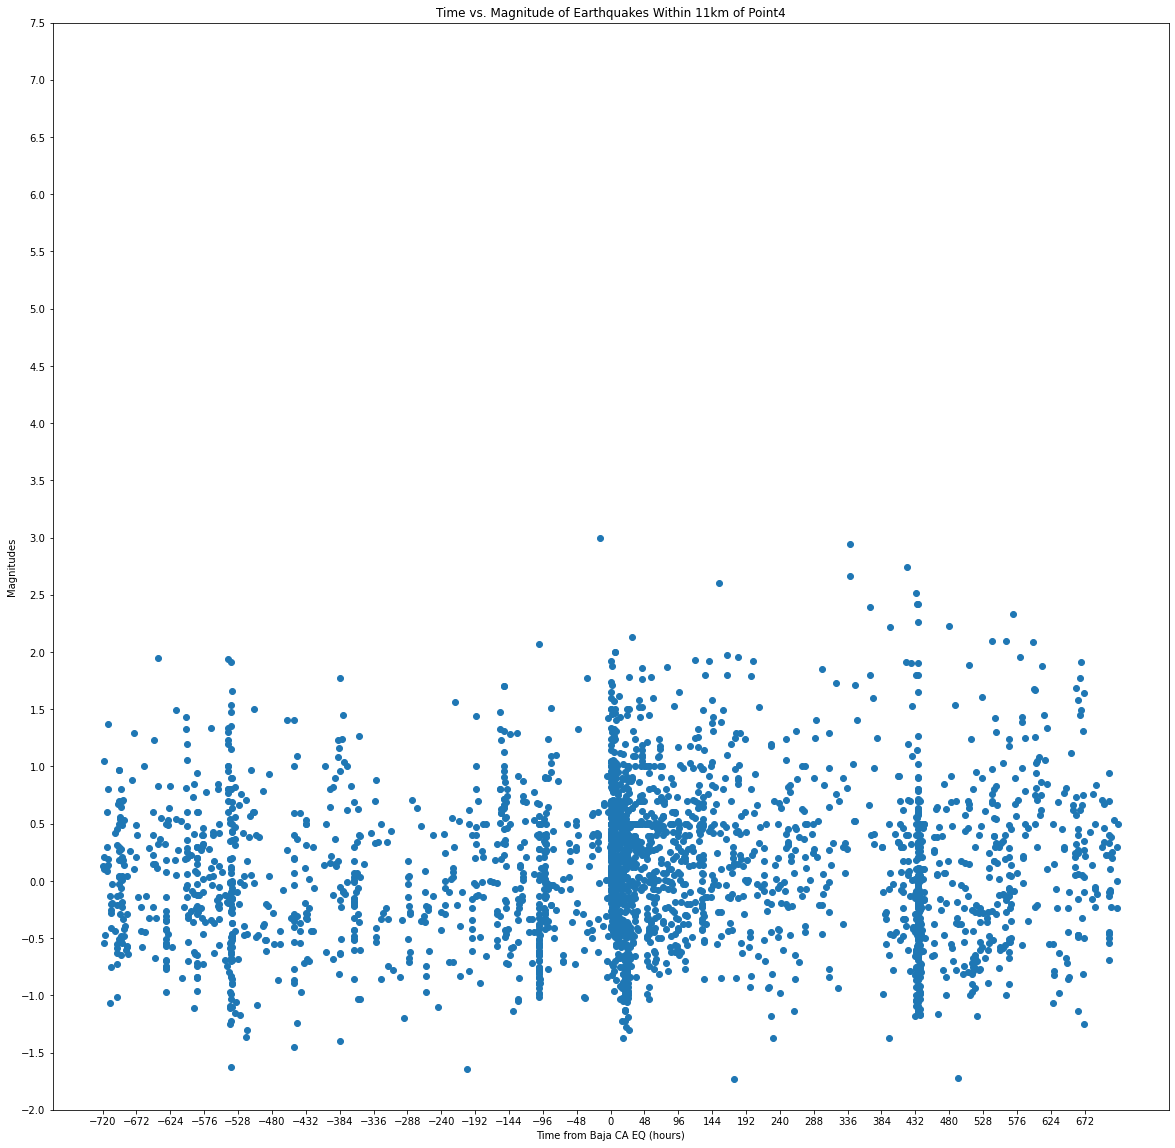

In [8]:
# Plot time vs. magnitude: hours

plt.figure(figsize=(20,20))
plt.scatter(Point4Data_11KM["RELATIVE HOUR"], Point4Data_11KM["MAGNITUDE"]);
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Magnitudes");
plt.title("Time vs. Magnitude of Earthquakes Within 11km of Point4");
plt.xticks(range(-720,720, 48));
plt.yticks(np.arange(-2,8,0.5));

plt.savefig("Maps/Density Grid/Point4/Point4_MagnitudeHours.png", facecolor = "white");

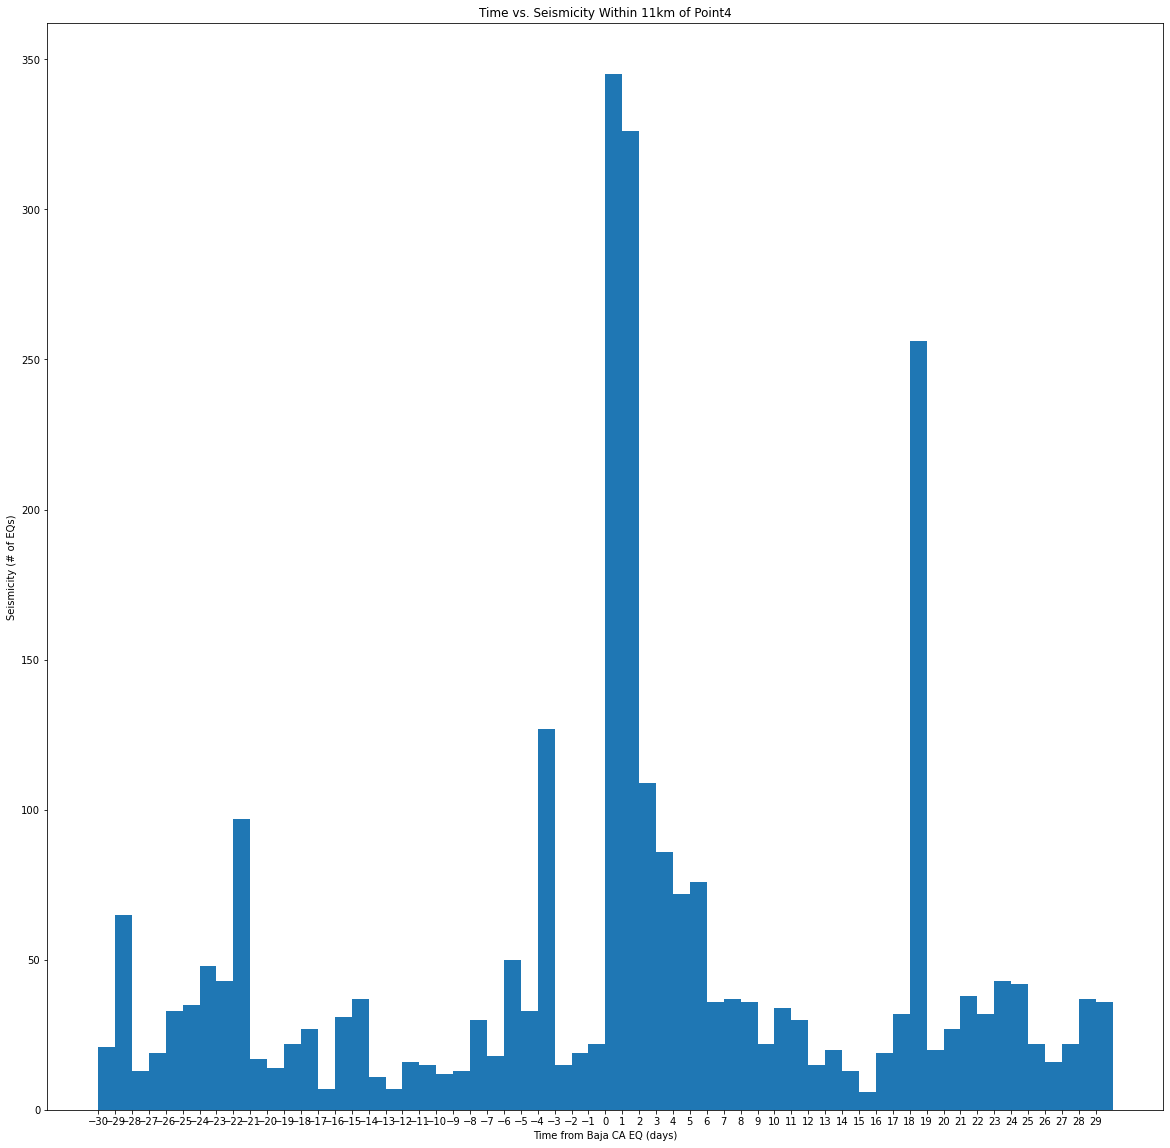

In [9]:
# Plot time vs. number of events: days

plt.figure(figsize=(20,20))
plt.hist(Point4Data_11KM["RELATIVE DAY"], bins = 60);
plt.xlabel("Time from Baja CA EQ (days)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Time vs. Seismicity Within 11km of Point4");
plt.xticks(range(-30,30));

plt.savefig("Maps/Density Grid/Point4/Point4_SeismicityDays.png", facecolor = "white")

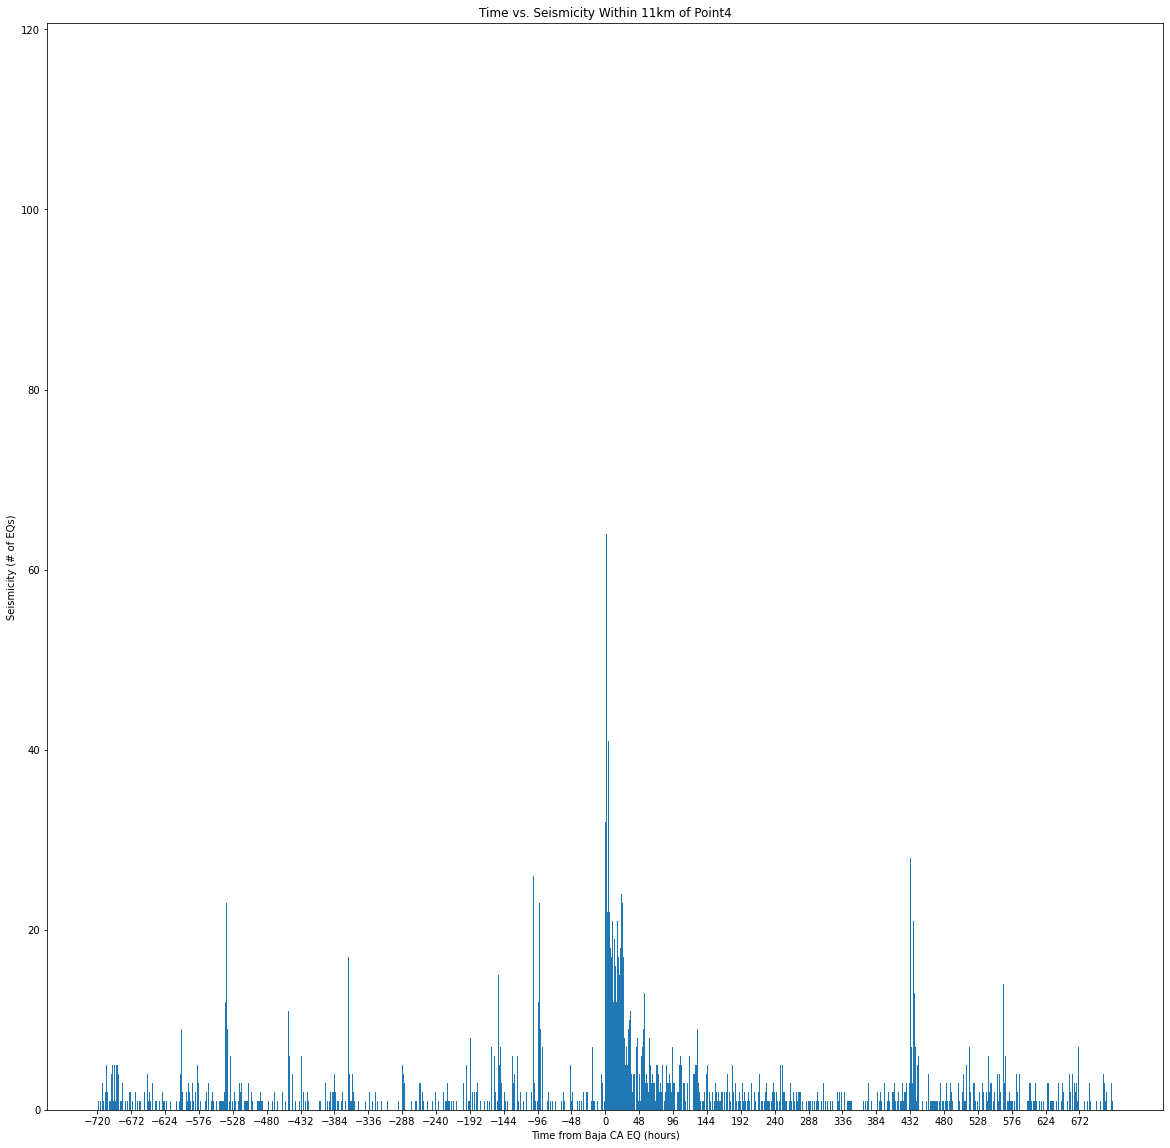

In [10]:
# Plot time vs. number of events: hours

plt.figure(figsize=(20,20))
plt.hist(Point4Data_11KM["RELATIVE HOUR"], bins = 60*24);
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Time vs. Seismicity Within 11km of Point4");
plt.xticks(np.arange(-720, 720, 48));

plt.savefig("Maps/Density Grid/Point4/Point4_SeismicityHours.png", facecolor = "white")

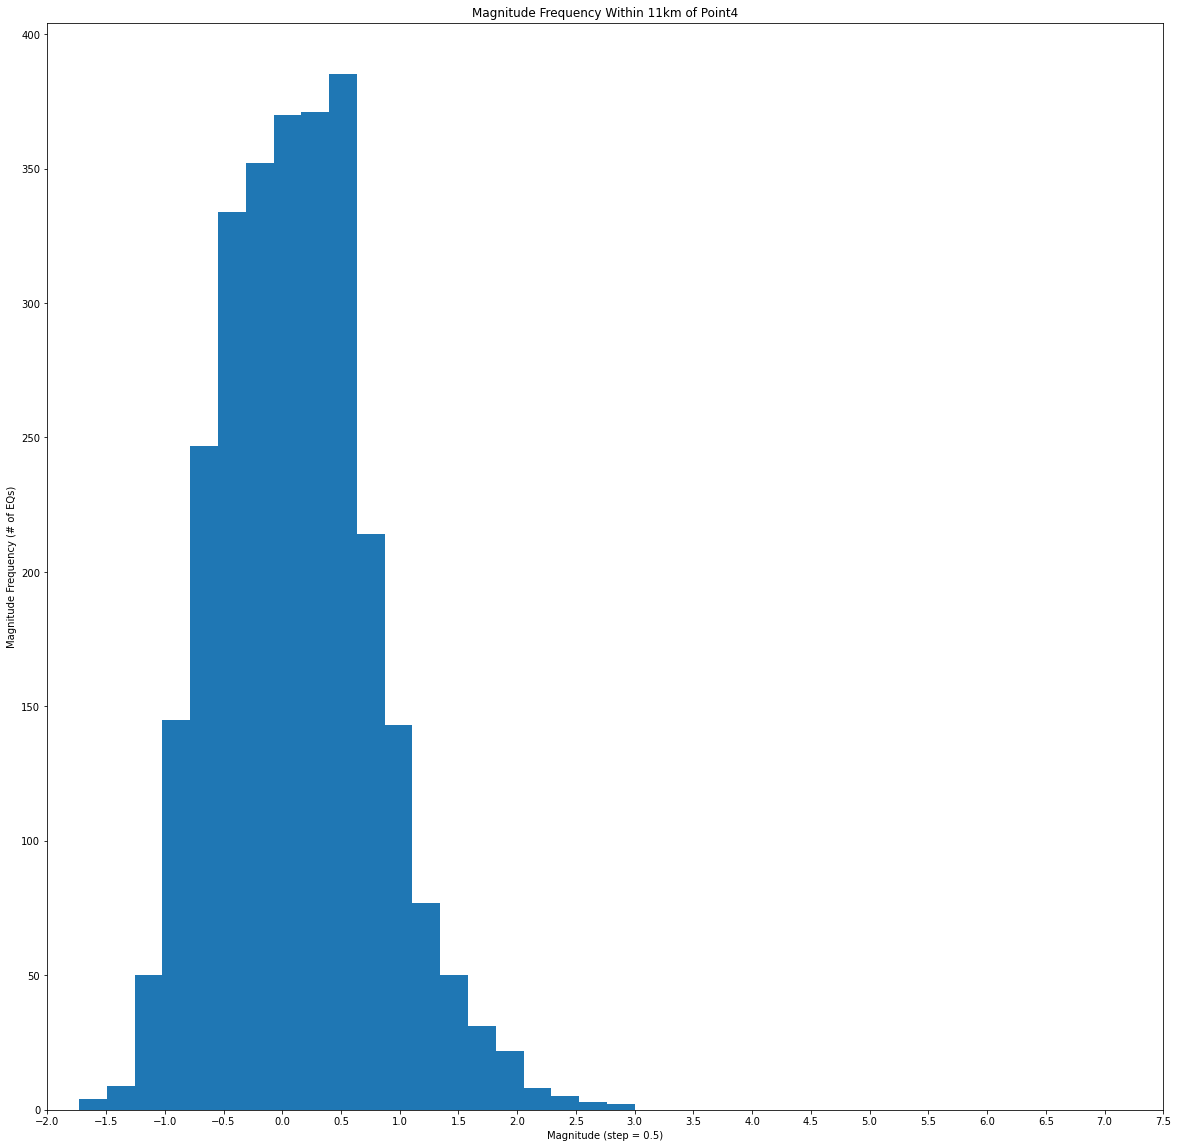

In [11]:
# Plot magnitude vs. event count (frequency)

plt.figure(figsize=(20,20))
plt.hist(Point4Data_11KM["MAGNITUDE"], bins = 20);
plt.xlabel("Magnitude (step = 0.5)");
plt.ylabel("Magnitude Frequency (# of EQs)");
plt.title("Magnitude Frequency Within 11km of Point4");
plt.xticks(np.arange(-2, 8, step = 0.5));

plt.savefig("Maps/Density Grid/Point4/Point4_MagFreq.png", facecolor = "white")